# 简介

+ 运算速度快：numpy 和 pandas 都是采用 C 语言编写, pandas 又是基于 numpy, 是 numpy 的升级版本。
+ 消耗资源少：采用的是矩阵运算，会比 python 自带的字典或者列表快好多

# Numpy 

In [2]:
# 衡量numpy的属性
import numpy as np

array = np.array(([1,2,3],[4,5,6]))
print("array的维度是",array.ndim)
print("array的形状是",array.shape)
print("array的元素个数是",array.size)

array的维度是 2
array的形状是 (2, 3)
array的元素个数是 6


## 初始化/创建
+ array：创建数组(创建连续数组)
+ dtype：指定数据类型
+ zeros：创建数据全为0
+ ones：创建数据全为1
+ empty：创建数据**接近**0
+ arange：按指定范围创建数据
+ linspace：创建线段

In [4]:
a = np.array([2,23,4],dtype=np.int64)
print(a.dtype)
# int 64

int64


In [5]:
#创建全空数组, 其实每个值都是接近于零的数:
a = np.empty((3,4))
a

array([[9.02385556e-312, 2.81617418e-322, 0.00000000e+000,
        0.00000000e+000],
       [8.45593933e-307, 1.61590357e+184, 4.76163332e-090,
        7.11286195e-038],
       [3.55144099e-062, 1.77461506e+160, 6.48224659e+170,
        4.93432906e+257]])

In [6]:
a = np.linspace(1,10,20)    # 开始端1，结束端10，且分割成20个数据，生成线段
a

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

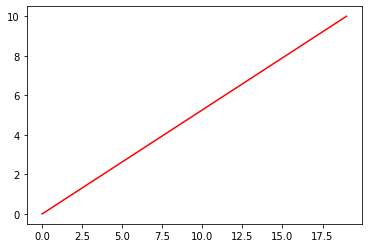

In [13]:
import matplotlib.pyplot as plt
x = np.arange(0,20) #左开右闭
y = np.linspace(0,10,20)

plt.figure()
plt.plot(x,y,color='red')
plt.show()

## 运算
+ 基础运算(对每个元素进行运算)
    + 加减乘除
    + 调用函数库 np.sin()
    + 判断大小
+ reshape() 改变矩阵shape
+ np.dot()矩阵点乘//a.dot(b)
+ 矩阵元素统计属性
    + np.sum/np.min/np.max (参数axis控制搜索行列)
    + argmax()/argmax()最大值最小值索引
    + np.mean/np.average()
    + cumsum()累加函数 diff()累差函数
    + nonzero() 将所有非零元素的行与列坐标分割开，重构成两个分别关于行和列的矩阵
    + clip() 将所有元素化在一个区间中

In [14]:
import numpy as np
a=np.array([10,20,30,40])   # array([10, 20, 30, 40])
b=np.arange(4)              # array([0, 1, 2, 3])

c=a-b  # array([10, 19, 28, 37])
c=a+b   # array([10, 21, 32, 43])
c=a*b   # array([0, 20, 60, 120])
c=b**2  # array([0, 1, 4, 9])
c=10*np.sin(a)  
print(b<3)  
# array([ True,  True,  True, False], dtype=bool)

[ True  True  True False]


In [15]:
A = np.arange(2,14).reshape((3,4)) 
print(np.cumsum(A)) 

[ 2  5  9 14 20 27 35 44 54 65 77 90]


In [16]:
print(np.clip(A,5,9))    

[[5 5 5 5]
 [6 7 8 9]
 [9 9 9 9]]


## 索引 (切片)
> flatten()展开性质的函数

In [19]:
A = np.arange(0,9).reshape(3,3)
# array([[0, 1, 2],
#        [3, 4, 5],
#        [6, 7, 8]])
A.flatten()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

## 合并
+ np.vstack() 上下合并
+ np.hstack() 左右合并
+ np.concatenate() 多个矩阵

In [23]:
A = np.array([[1,1,1],[1,1,1]])
B = np.array([[2,2,2],[2,2,2]])

C = np.concatenate((A,B,B,A),axis=0)#上下
# array([[1, 1, 1],
#        [1, 1, 1],
#        [2, 2, 2],
#        [2, 2, 2],
#        [2, 2, 2],
#        [2, 2, 2],
#        [1, 1, 1],
#        [1, 1, 1]]
D = np.concatenate((A,B,B,A),axis=1)#左右
D

array([[1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1],
       [1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1]])

## 分割
+ np.split(array,num,axis=0/1) 0--纵向分割 1--横向分割 **等量分割**

In [24]:
A = np.arange(12).reshape((3, 4))
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [25]:
np.split(A, 2, axis=1)

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

## Numpy copy & deep copy
+ = 的赋值方式会带有关联性
+ copy()的赋值方式没有关联性

In [26]:
import numpy as np

a = np.arange(4)
# array([0, 1, 2, 3])

b = a
c = a
d = b

a[0] = 11
# print(a)
# array([11,  1,  2,  3])

d[1:3] = [22, 33]   # array([11, 22, 33,  3])
print(a)            # array([11, 22, 33,  3])
print(b)            # array([11, 22, 33,  3])
print(c)            # array([11, 22, 33,  3])

[11  1  2  3]
[11 22 33  3]
[11 22 33  3]
[11 22 33  3]


In [27]:
b = a.copy()    # deep copy
print(b)        # array([11, 22, 33,  3])
a[3] = 44
print(a)        # array([11, 22, 33, 44])
print(b)        # array([11, 22, 33,  3])

[11 22 33  3]
[11 22 33 44]
[11 22 33  3]


# Pandas

## 基本介绍
> 如果用 python 的列表和字典来作比较, 那么可以说 Numpy 是列表形式的，没有数值标签，而 Pandas 就是字典形式。Pandas是基于Numpy构建的，让Numpy为中心的应用变得更加简单

+ dataframe基本操作
    + 基本属性
        + pd.DataFrame.dtypes 数据类型
        + pd.DataFrame.index 列的序号
        + pd.DataFrame.columns 行号
        + pd.DataFrame.values 值--array型
        + pd.DataFrame.describe() 数据总结
    + 数据操作
        + pd.DataFrame.T 转置
        + pd.DataFrame.sort_index() 对index排序输出
        + pd.DataFrame.sort_values() 对数据的值排序输出

In [28]:
## Serious
# Series的字符串表现形式为：索引在左边，值在右边。
# 由于我们没有为数据指定索引。于是会自动创建一个0到N-1（N为长度）的整数型索引。
import pandas as pd
import numpy as np
s = pd.Series([1,3,6,np.nan,44,1])

print(s)

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


'\n0     1.0\n1     3.0\n2     6.0\n3     NaN\n4    44.0\n5     1.0\ndtype: float64\n'

In [29]:
# dataframe
#DataFrame是一个表格型的数据结构，它包含有一组有序的列，
# 每列可以是不同的值类型（数值，字符串，布尔值等）

# DataFrame既有行索引也有列索引， 它可以被看做由Series组成的大字典。
# 我们可以根据每一个不同的索引来挑选数据, 比如挑选 b 的元素:
dates = pd.date_range('20160101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])

print(df)

                   a         b         c         d
2016-01-01  0.998791 -0.455416 -0.611665  1.444916
2016-01-02  0.370824 -1.325098 -0.654169  0.245855
2016-01-03 -1.244121 -0.012534  0.265923 -1.411231
2016-01-04  0.561068 -0.503463  0.555158 -0.401942
2016-01-05 -0.734433 -0.287569 -0.042957 -0.347748
2016-01-06  1.524137  0.617270 -0.260376 -0.149486


## 索引
+ 朴素
    + df['A']
    + df[0:3]
+ 根据标签 loc **选取行**
    + df.loc['2013-01-01']
    + df.loc[:,['A','B']]
    + df.loc['20130102',['A','B']]
+ 采用位置选择 iloc
    + df.iloc[[1,3,5],1:3]
+ 混合选择 ix
    + df.ix[:3,['A','C']]
+ 通过判断的筛选
    + df[df.A>8]

In [ ]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])

"""
             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
"""

## 处理丢失数据
+ pd.dropna() 丢弃NaN的行或列
+ pd.fillna(value=0) 其他值代替
+ pd.isnull() 判断是否有缺失数据 NaN, 为 True 表示缺失数据

In [31]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
df

,A,B,C,D
2013-01-01,0,NaN,2.0,3
2013-01-02,4,5.0,NaN,7
2013-01-03,8,9.0,10.0,11
2013-01-04,12,13.0,14.0,15
2013-01-05,16,17.0,18.0,19
2013-01-06,20,21.0,22.0,23


In [32]:
np.any(df.isnull()) == True  

True

## 合并
+ concat()
    + axis 0--纵向 1--横向
    + ignore_index (重置 index) 
    + join (合并方式) 默认为outer
+ append() 只有纵向合并，没有横向合并
+ merge() 合并具有同一列的数据
    + 一组key合并
    + 两组key合并 合并时有4种方法how = ['left', 'right', 'outer', 'inner'] 默认how='inner'
    + Indicator 将合并的记录放在新的一列
    + 依据index合并

In [33]:
# outer
#此方式是依照column来做纵向合并，有相同的column上下合并在一起，
# 其他独自的column个自成列，原本没有值的位置皆以NaN填充。
import pandas as pd
import numpy as np

#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])

#纵向"外"合并df1与df2
res = pd.concat([df1, df2], axis=0, join='outer')

print(res)

     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


In [35]:
## inner
res = pd.concat([df1, df2], axis=0, join='inner', ignore_index=True)
res

,b,c,d
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0
5,1.0,1.0,1.0


In [37]:
import pandas as pd
import numpy as np

#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])

#将df2合并到df1的下面，以及重置index，并打印出结果
res = df1.append(df2, ignore_index=True)
print(res)
#     a    b    c    d
# 0  0.0  0.0  0.0  0.0
# 1  0.0  0.0  0.0  0.0
# 2  0.0  0.0  0.0  0.0
# 3  1.0  1.0  1.0  1.0
# 4  1.0  1.0  1.0  1.0
# 5  1.0  1.0  1.0  1.0

#合并多个df，将df2与df3合并至df1的下面，以及重置index，并打印出结果
res = df1.append([df2, df3], ignore_index=True)
print(res)
#     a    b    c    d
# 0  0.0  0.0  0.0  0.0
# 1  0.0  0.0  0.0  0.0
# 2  0.0  0.0  0.0  0.0
# 3  1.0  1.0  1.0  1.0
# 4  1.0  1.0  1.0  1.0
# 5  1.0  1.0  1.0  1.0
# 6  1.0  1.0  1.0  1.0
# 7  1.0  1.0  1.0  1.0
# 8  1.0  1.0  1.0  1.0

#合并series，将s1合并至df1，以及重置index，并打印出结果
res = df1.append(s1, ignore_index=True)
print(res)
#     a    b    c    d
# 0  0.0  0.0  0.0  0.0
# 1  0.0  0.0  0.0  0.0
# 2  0.0  0.0  0.0  0.0
# 3  1.0  2.0  3.0  4.0

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  1.0  1.0  1.0  1.0
7  1.0  1.0  1.0  1.0
8  1.0  1.0  1.0  1.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


In [ ]:
# merge

import pandas as pd

#定义资料集并打印出
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})

print(left)
#    A   B key1 key2
# 0  A0  B0   K0   K0
# 1  A1  B1   K0   K1
# 2  A2  B2   K1   K0
# 3  A3  B3   K2   K1

print(right)
#    C   D key1 key2
# 0  C0  D0   K0   K0
# 1  C1  D1   K1   K0
# 2  C2  D2   K1   K0
# 3  C3  D3   K2   K0

#依据key1与key2 columns进行合并，并打印出四种结果['left', 'right', 'outer', 'inner']
res = pd.merge(left, right, on=['key1', 'key2'], how='inner')
print(res)
#    A   B key1 key2   C   D
# 0  A0  B0   K0   K0  C0  D0
# 1  A2  B2   K1   K0  C1  D1
# 2  A2  B2   K1   K0  C2  D2

res = pd.merge(left, right, on=['key1', 'key2'], how='outer')
print(res)
#     A    B key1 key2    C    D
# 0   A0   B0   K0   K0   C0   D0
# 1   A1   B1   K0   K1  NaN  NaN
# 2   A2   B2   K1   K0   C1   D1
# 3   A2   B2   K1   K0   C2   D2
# 4   A3   B3   K2   K1  NaN  NaN
# 5  NaN  NaN   K2   K0   C3   D3

res = pd.merge(left, right, on=['key1', 'key2'], how='left')
print(res)
#    A   B key1 key2    C    D
# 0  A0  B0   K0   K0   C0   D0
# 1  A1  B1   K0   K1  NaN  NaN
# 2  A2  B2   K1   K0   C1   D1
# 3  A2  B2   K1   K0   C2   D2
# 4  A3  B3   K2   K1  NaN  NaN

res = pd.merge(left, right, on=['key1', 'key2'], how='right')
print(res)
#     A    B key1 key2   C   D
# 0   A0   B0   K0   K0  C0  D0
# 1   A2   B2   K1   K0  C1  D1
# 2   A2   B2   K1   K0  C2  D2
# 3  NaN  NaN   K2   K0  C3  D3

In [38]:
# 依据index进行合并
import pandas as pd

#定义资料集并打印出
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

print(left)
#     A   B
# K0  A0  B0
# K1  A1  B1
# K2  A2  B2

print(right)
#     C   D
# K0  C0  D0
# K2  C2  D2
# K3  C3  D3

#依据左右资料集的index进行合并，how='outer',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
print(res)
#      A    B    C    D
# K0   A0   B0   C0   D0
# K1   A1   B1  NaN  NaN
# K2   A2   B2   C2   D2
# K3  NaN  NaN   C3   D3

#依据左右资料集的index进行合并，how='inner',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')
print(res)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3
      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3
     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


## 画图plot 

### 创建一个Series 

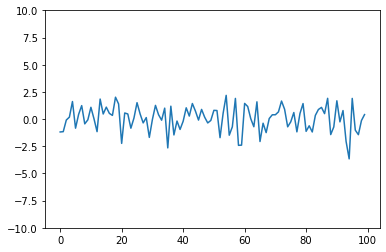

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 随机生成1000个数据
data = pd.Series(np.random.randn(100),index=np.arange(100))
 
# 为了方便观看效果, 我们累加这个数据
data.cumsum()
# pandas 数据可以直接观看其可视化形式
data.plot()
plt.ylim(-10,10)
plt.show()

### Dataframe 可视化 

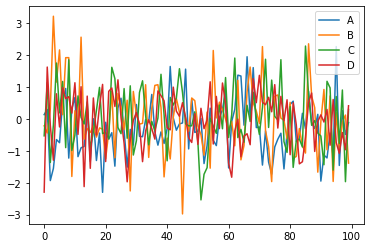

In [45]:
data = pd.DataFrame(
    np.random.randn(100,4),
    index=np.arange(100),
    columns=list("ABCD")
    )
data.cumsum()
data.plot()
plt.show()

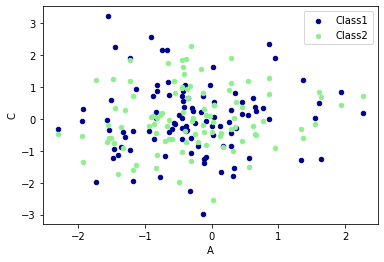

In [47]:
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')
# 将之下这个 data 画在上一个 ax 上面
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
plt.show()